# Problem description

In this demo, we will look at the International Airline Passengers prediction problem.

This is a problem where, given a year-month, the task is to predict the number of internation airline passengers in units of 1,000. See folder `data/` for a description of the dataset (*international-ailine-passengers.csv*).
Here's how the data look like in the file:

Let's import/load the data, but take into consideration the following:
   1. we are not interested in the date, given that each observation is separated by the same interval of one month; hence we can exclude the first column
   2. the file contains some footer information that we need to discard using the **skipfooter** argument to **pandas.read_csv()** set to 3.

In [25]:
import pandas     # pandas is a great tool for dealing with csv files
dataset = pandas.read_csv('/notebooks/tutorials-deep-learning/data/international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)

Let's just inspect the data:

In [26]:
dataset

International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0                                                  112                             
1                                                  118                             
2                                                  132                             
3                                                  129                             
4                                                  121                             
5                                                  135                             
6                                                  148                             
7                                                  148                             
8                                                  136                             
9                                                  119                             
10                                                 104                             
11                                                 118                             
12                                                 115                             
13                                                 126                             
14                                                 141                             
15                                                 135                             
16                                                 125                             
17                                                 149                             
18                                                 170                             
19                                                 170                             
20                                                 158                             
21                                                 133                             
22                                                 114                             
23                                                 140                             
24                                                 145                             
25                                                 150                             
26                                                 178                             
27                                                 163                             
28                                                 172                             
29                                                 178                             
..                                                 ...                             
114                                                491                             
115                                                505                             
116                                                404                             
117                                                359                             
118                                                310                             
119                                                337                             
120                                                360                             
121                                                342                             
122                                                406                             
123                                                396                             
124                                                420                             
125                                                472                             
126                                                548                             
127                                                559                             
128                                                463                             
129                                                407   

Next, plot the data:

In [34]:
import matplotlib.pyplot          # import libraries
import matplotlib.pyplot as plt

In [35]:
%matplotlib inline                # we'll now tell matplotlib to "inline" plots using an ipython magic function

UsageError: unrecognized arguments: # we'll now tell matplotlib to "inline" plots using an ipython magic function


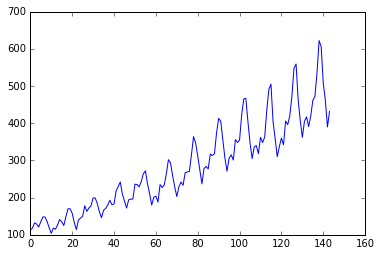

In [32]:
plt.plot(dataset)
plt.show()

# Using LSTMs

We phrase the time series prediction problem as a regression problem.

That is, given the number of passengers (in units of thousands) this month, what is the number of passengers next month. 

Before we get started, let’s first import all of the functions and classes we intend to use.

In [41]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [42]:
%matplotlib inline         # we'll now tell matplotlib to "inline" plots using an ipython magic function

In [43]:
# fix random seed for reproducibility
numpy.random.seed(7)

Load the data (as above) and set the format of the values!

In [44]:
# load the dataset
dataframe = pandas.read_csv('/notebooks/tutorials-deep-learning/data/international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')

Now, normalise the data in order to speed up the training process! Here, we scale values to be between 0 and 1 (using a max-min transformation).

In [45]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

Split the data into train and test sets! In this case, we will use the first 70% of the timeseries for training, and the last 30% of the data for testing how accurate our predictions are!

In [46]:
# split into train and test sets
train_size = int(len(dataset) * 0.70)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

100 44


We need to create the dataset 

In [47]:
# convert an array of values into a dataset matrix
def prepare_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [48]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = prepare_dataset(train, look_back)
testX, testY = prepare_dataset(test, look_back)

In [49]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [50]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_dim=look_back))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, nb_epoch=100, batch_size=1, verbose=2)

Epoch 1/100
0s - loss: 0.0446
Epoch 2/100
0s - loss: 0.0205
Epoch 3/100
0s - loss: 0.0151
Epoch 4/100
0s - loss: 0.0134
Epoch 5/100
0s - loss: 0.0121
Epoch 6/100
0s - loss: 0.0107
Epoch 7/100
0s - loss: 0.0097
Epoch 8/100
0s - loss: 0.0084
Epoch 9/100
0s - loss: 0.0073
Epoch 10/100
0s - loss: 0.0063
Epoch 11/100
0s - loss: 0.0054
Epoch 12/100
0s - loss: 0.0046
Epoch 13/100
0s - loss: 0.0039
Epoch 14/100
0s - loss: 0.0034
Epoch 15/100
0s - loss: 0.0030
Epoch 16/100
0s - loss: 0.0026
Epoch 17/100
0s - loss: 0.0025
Epoch 18/100
0s - loss: 0.0023
Epoch 19/100
0s - loss: 0.0023
Epoch 20/100
0s - loss: 0.0022
Epoch 21/100
0s - loss: 0.0021
Epoch 22/100
0s - loss: 0.0021
Epoch 23/100
0s - loss: 0.0021
Epoch 24/100
0s - loss: 0.0020
Epoch 25/100
0s - loss: 0.0021
Epoch 26/100
0s - loss: 0.0020
Epoch 27/100
0s - loss: 0.0021
Epoch 28/100
0s - loss: 0.0021
Epoch 29/100
0s - loss: 0.0022
Epoch 30/100
0s - loss: 0.0020
Epoch 31/100
0s - loss: 0.0021
Epoch 32/100
0s - loss: 0.0021
Epoch 33/100
0s -

In [51]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 23.40 RMSE
Test Score: 54.57 RMSE


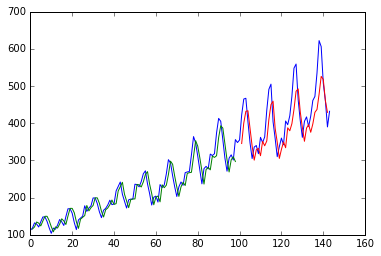

In [52]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

Different configurations are also possible!